In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv("trainKNN.txt", sep=",", names = ["Id", "RI", "Na", "Mg","Al", "Si", "K", "Ca","Ba", "Fe", "Type"])
test = pd.read_csv("testKNN.txt", sep=",", names =["RI", "Na", "Mg","Al", "Si", "K", "Ca","Ba", "Fe", "Type"])

In [3]:
train

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [4]:
test.shape

(18, 10)

In [5]:
train.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
test.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
test.reset_index(inplace=True)

In [8]:
test

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [9]:
test.rename(columns={"index": "Id"}, inplace=True)

In [10]:
test

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


<AxesSubplot:>

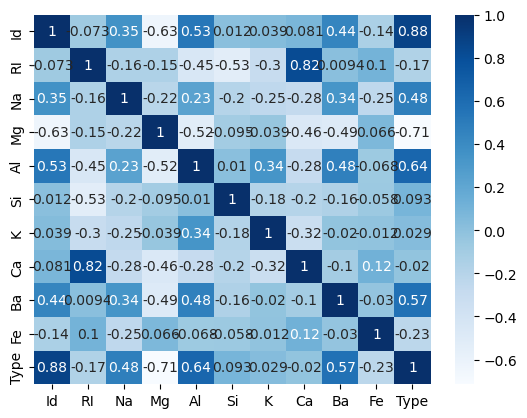

In [11]:
corr_df = train.corr()
sns.heatmap(corr_df, annot=True, cmap="Blues")

In [12]:
df =pd.concat([train, test])

In [13]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
14,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
15,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
16,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
df.reset_index(inplace=True)

In [15]:
df.drop("index",axis=1, inplace=True)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
210,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
df.drop("Id", axis=1, inplace=True)

In [17]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [27]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
210,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


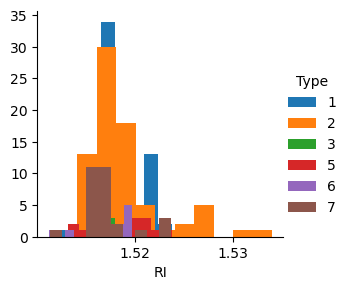

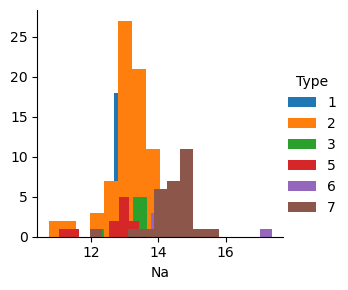

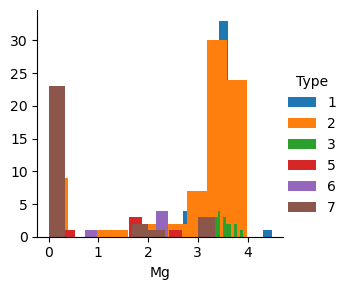

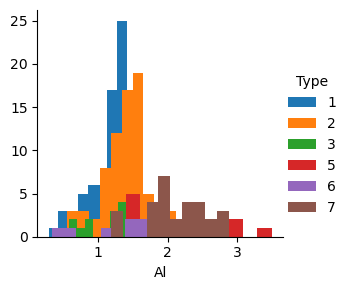

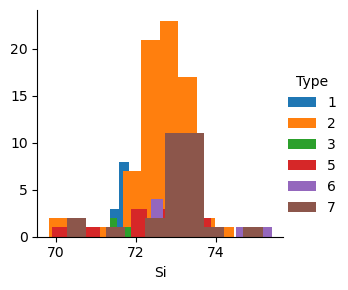

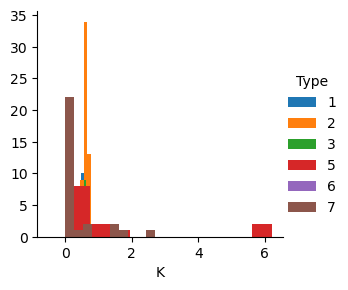

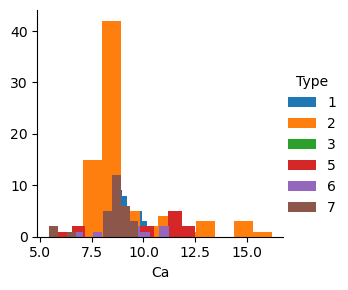

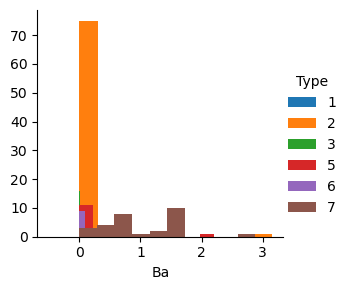

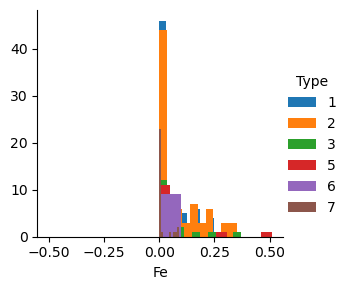

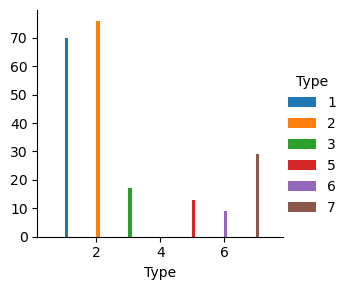

In [18]:
for col in df.columns:
    g = sns.FacetGrid(df, hue="Type")
    g.map(plt.hist, col)
    g.add_legend()
    

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix\
                            , classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
import time

In [20]:
def optimize(model, params, X_train, y_train, n_folds=5):
    gcv = GridSearchCV(model, param_grid = params, scoring="accuracy", cv=n_folds)
    #t0 = time.time()
    gcv.fit(X_train, y_train)
    #time = time.time() - t0
    
    print(f"========== {type(model).__name__} =========")
    #print("time taken for tuning {:.2f}".format(time))
    print("BEST PARAMS", gcv.best_params_)
    
    best_model = gcv.best_estimator_
    return best_model
    

In [34]:
def classify(model,df, params,targetname, featurenames="all"):
    if featurenames =="all":
        X = df.drop([targetname], axis=1)
    else:
        X= df[featurenames]
        
    y = df[targetname]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    gcv_model = optimize(model, params, X_train, y_train)
    knn_model = gcv_model.fit(X_train, y_train)
    
    training_accuracy = knn_model.score(X_train, y_train)
    test_accuracy = knn_model.score(X_test, y_test)
    
    precision = precision_score(y_test, knn_model.predict(X_test), pos_label="positive", average="micro")
    recall = recall_score(y_test, knn_model.predict(X_test), pos_label="positive", average="micro")
    #auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
    
    print("Training_accuracy", training_accuracy)
    print("Test accuracy", test_accuracy)
    print("Precision on test set", precision)
    print("Recall on test set", recall)
    #print("AUC on test test", auc)
    
    print("=========== Confusion Matrix =============")
    print(confusion_matrix(y_test, knn_model.predict(X_test)))
    
    print("=========== Classification Report ============")
    print(classification_report(y_test, knn_model.predict(X_test)))
    
    print("="* 50)
    print("="*50)
    print("="*50)
    
    
    return knn_model, X_train, X_test, y_train, y_test
    
    
    

In [40]:
knn_model = KNeighborsClassifier(metric="euclidean")
params = {"n_neighbors":[5, 10, 15, 20],
         "weights":["uniform", "distance"],
         "algorithm":["auto", "ball_tree","kd_tree", "brute"],
         "leaf_size":[30, 60, 90],
         "p":[2,4, 6, 8]}

In [41]:
knn_model, X_train, X_test, y_train, y_test = classify(knn_model,df,  params=params, targetname="Type")

========== KNeighborsClassifier =========
BEST PARAMS {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Training_accuracy 1.0
Test accuracy 0.7209302325581395
Precision on test set 0.7209302325581395
Recall on test set 0.7209302325581395
=========== Confusion Matrix =============
[[16  3  0  0  0  0]
 [ 3 10  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  2]]
=========== Classification Report ============
              precision    recall  f1-score   support

           1       0.76      0.84      0.80        19
           2       0.71      0.71      0.71        14
           3       1.00      0.33      0.50         3
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         1
           7       0.50      1.00      0.67         2

    accuracy                           0.72        43
   macro avg       0.61      0.56      0.54        43
weighted avg      

/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vinayakmodgil/miniforge3/envs/tenso

In [38]:
feat_imp = pd.DataFrame(knn_model.feature_importances_)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [43]:
knn_model2 = KNeighborsClassifier(metric="manhattan")
knn_model2 , X_train, X_test, y_train, y_test = classify(knn_model2, df, params=params, targetname="Type")

========== KNeighborsClassifier =========
BEST PARAMS {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Training_accuracy 1.0
Test accuracy 0.7209302325581395
Precision on test set 0.7209302325581395
Recall on test set 0.7209302325581395
=========== Confusion Matrix =============
[[16  3  0  0  0  0]
 [ 3 10  0  0  1  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  2]]
=========== Classification Report ============
              precision    recall  f1-score   support

           1       0.73      0.84      0.78        19
           2       0.71      0.71      0.71        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2

    accuracy                           0.72        43
   macro avg       0.52      0.55      0.53        43
weighted avg      

/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/vinayakmodgil/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vinayakmodgil/miniforge3/envs/tenso